In [ ]:
!pip install transformers==4.28.0
!pip install wandb
!pip install vaderSentiment
!pip install afinn
!pip install emoji==0.6.0
import wandb
import pandas as pd
import numpy as np
import itertools
import requests
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
import torch
import numpy as np
from scipy import stats
from afinn import Afinn
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import BertTokenizer, BertForSequenceClassification
from dateutil import parser
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

# database = pd.read_csv('database_full_v0.csv')

def get_corr(list_1, checker):
  res = stats.pearsonr(list_1, checker)
  return res.statistic

# infl_1 = pd.read_csv('14_04_infl_1.csv')
# infl_2 = pd.read_csv('14_04_infl_2.csv')
# proj_1 = pd.read_csv('14_04_project_1.csv')
# proj_2 = pd.read_csv('14_04_project_2.csv')
# proj_3 = pd.read_csv('14_04_project_3.csv')
# proj_4 = pd.read_csv('14_04_project_4.csv')
# proj_5 = pd.read_csv('14_04_project_5.csv')
# proj_6 = pd.read_csv('14_04_project_6.csv')
# bayc_1 = pd.read_csv('project_bayc_1.csv')


# infl_1.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# infl_2.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_1.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_2.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_3.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_4.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_5.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# proj_6.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )
# bayc_1.drop(['UserScreenName', 'Text', 'Image link'], axis= 1 , inplace= True )


# infl_1['source'] = 'infl'
# infl_2['source'] = 'infl'
# proj_1['source'] = 'proj'
# proj_2['source'] = 'proj'
# proj_3['source'] = 'proj'
# proj_4['source'] = 'proj'
# proj_5['source'] = 'proj'
# proj_6['source'] = 'proj'
# bayc_1['source'] = 'bayc'


# database = pd.concat([infl_1, infl_2,proj_1,proj_2,proj_3,proj_4,proj_5,proj_6,bayc_1], ignore_index=True)
# database = database.replace(r'\n',' ', regex=True) 
# database.head()
# database.info(verbose=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=412c7f907a12fea5f83b6d1150b4784a59eee826624529a43ab8d8f03833e87c
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
!pip install git+https://github.com/huggingface/accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-edcl5gs9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-edcl5gs9
  Resolved https://github.com/huggingface/accelerate to commit 99d790dc343731b69ae7c35250dc03c24e6b558a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=225201 sha256=a625714f93943c0294dd110ddbbdfe9a961e7ab97caeda0ceb249bfeb08a37e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-5jr5z06j/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate


In [ ]:
tweets_list = database['Embedded_text'].astype(str).values.tolist()
tweets_list = tweets_list[:1000]
print(tweets_list[:3])

['Swept some  @winterbearsnft  ', 'Now you guys are finally listening @crypto_raiders', 'I realized today that I think people who don’t have a NFT as a profile pic are kinda weird.']


Getting tokenizer and model


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.8 MB/s eta 0:00:00


In [ ]:
wandb.init(project="FinBERT_NFT_Sentiment_Analysis")

tweet_table = wandb.Table(columns=["Tweet", "Positive", "Negative", "Neutral"])

In [ ]:
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

STRIDE = 1

model.eval()

n=0
for tweets in zip(chunk_list(tweets_list, STRIDE)):
  
  input = tokenizer(tweets, padding = True, truncation = True,  is_split_into_words=True, return_tensors='pt')
  
  outputs = model(**input)

  prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)
  # print(prediction.tolist()[0])

  print(f"{n+1}/{int(len(tweets_list)/STRIDE)}") 

  for tweet, pos, neg, neutr in zip(tweets, prediction[:, 0].tolist(), prediction[:, 1].tolist(), prediction[:, 2].tolist() ): 
    tweet_table.add_data(tweet, pos, neg, neutr)
   
  n+=1

In [ ]:
wandb.run.log({"NFT Sentiment Analysis Table" : tweet_table})
wandb.run.finish()

**Dataset load**

In [ ]:
df = pd.read_csv('database_for_models.csv')
df1 = pd.read_csv('database_19_02_razmetka.csv')
df2 = pd.read_csv('database_31_01_razmetka.csv')
df1 = df1[~df1.text.str.contains("https://")]
df2 = df2[~df2.text.str.contains("https://")]
df1.to_csv('database_19_02_razmetka_1.csv')
df2.to_csv('database_31_01_razmetka_1.csv')

# model_check = df[~df.text.str.contains("https://")]
# model_check.to_csv('database_for_models_2.csv')
model_check = df
checker = model_check['Emotion'].to_list()
checker = [int(item) for item in checker]
model_check['Emotion'].value_counts()
two_labels_check = list()
list_scores = model_check['Score'].to_list()
for i in list_scores:
  if i > 0:
    two_labels_check.append(1)
  else:
    two_labels_check.append(0) 

In [ ]:
from sklearn.metrics import accuracy_score
target_names = ['0', '1', '2']

**Afinn model**



In [ ]:
def afinn_polarity(text):
    return Afinn().score(text)
def getAnalysis(score):
    if score < 0:
        return 0
    elif score == 0:
        return 2
    else:
        return 1
model_check['afinn_polarity'] = model_check['text'].apply(afinn_polarity)
model_check['afinn_class'] = model_check['afinn_polarity'].apply(getAnalysis)
sent_val = model_check['afinn_class'].tolist()
afinn_res = get_corr(sent_val, checker)
print(afinn_res)


afinn_acc =  accuracy_score(checker, sent_val)
print(afinn_acc)

print(classification_report(checker, sent_val, target_names=target_names))

0.32448696339609046
0.524
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        92
           1       0.43      0.69      0.53       150
           2       0.68      0.41      0.51       258

    accuracy                           0.52       500
   macro avg       0.54      0.56      0.53       500
weighted avg       0.57      0.52      0.52       500



In [ ]:
tweet_list = model_check['text'].to_list()
counter = 0
for i in range(len(checker)):
  if sent_val[i] != checker[i]:
    print('True: ', checker[i], 'Output ', sent_val[i], tweet_list[i], '\n')
    counter += 1
print(counter)

**Vader**




In [ ]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:


new_words = {
    'foo': 2.0,
    'bar': -3.4,
    'bleed': -4.0,
    'buy': 2.0,
    'buying': 2.0,
    'bought': 2.0,
    'picked up': 2.0,
    'under': -2.0,
    'bearish': -4.0,
    'bear': -3.0,
    'bull':	3.0,
    'bullish': 4.0,
    'banger': 4.0,
    'rug': -4.0,
    'rugged': -4.0,
    'rugpull': -4.0,
    'rug pull': -4.0,
    'dipping': -4.0,
    'l': -3.0,
    'up only': 4.0,
    'coming back': 3.0,
    'comeback': 4.0,
    'back over': 4.0,
    'bull trap': -4.0,
    'we cook': 4.0,
    'we cookin': 4.0,
    'we cooking': 4.0,
    'cook': 3.0,
    'cooking': 3.0,
    'clown shit': -4.0,
    'not dead': 4.0,
    'ngmi': -4.0,
    'sweep': 3.0,
    'swept': 3.0,
    'sweeping': 3.0,
    'fud': -4.0,
    'fudding': -4.0,
    'added value': 3.0,
    'good vibe': 3.0,
    'good vibes': 3.0,
    'blessed': 3.0,
    'pump': 4.0,
    'pumped': 4.0,
    'pumping': 4.0,
    'fucking insane': 3.0,
    'fml': -4.0,
    'blue chip': 2.0,
    'toxity': -3.0,
    "can't wait": 3.0,
    'jumped': 3.0,
    'leads': 2.0,
    'sick edit': 3.0,
    'poppin': 2.0,
    'popping': 2.0,
    'fade': -2.0,
    "don't fade": 2.0,
    'faded': -3.0,
    'wagmi': 4.0,
    'wgmi': 4.0,
    'minting': 3.0,
    'mintin': 3.0,
    'not minting': -3.0,
    'not mintin': -3.0,
    'outraged': -3,
    'capitulated': -2,
    'red flag': -3,
    'ponzi': -4,
    'epic': 2,
    'future': 2,
    'engagement farming': -3,
    'moon': 3,
    'bears': -3,
    'super': 3,
    'mfers': -4,
    'made it': 3,
    'down': -3,
    'down bad': -5,
    'down-only': -5,
    'drained': -5,
    'flooring': -2,

}
SIA = SentimentIntensityAnalyzer()

SIA.lexicon.update(new_words)

In [ ]:


def varder_polarity(text):
    return SIA.polarity_scores(text)
def varder_analysis(score):
    if score['compound'] >= 0.05:
        return 1
    elif score['compound'] <= -0.5:
        return 0
    else:
        return 2
model_check['vader_polarity'] = model_check['text'].apply(varder_polarity)
model_check['vader_polarity'].head()
model_check['vader_class'] = model_check['vader_polarity'].apply(varder_analysis)
sent_val = model_check['vader_class'].tolist()
vader_res = get_corr(sent_val, checker)
print(vader_res)

vader_acc =  accuracy_score(checker, sent_val)
print(vader_acc)

print(classification_report(checker, sent_val, target_names=target_names))

0.31272338225135704
0.564
              precision    recall  f1-score   support

           0       0.61      0.41      0.49        87
           1       0.47      0.81      0.59       160
           2       0.70      0.46      0.56       253

    accuracy                           0.56       500
   macro avg       0.59      0.56      0.55       500
weighted avg       0.61      0.56      0.56       500



In [ ]:
tweet_list = model_check['text'].to_list()
counter = 0
for i in range(len(checker)):
  if sent_val[i] != checker[i]:
    print('True: ', checker[i], 'Output ', sent_val[i], tweet_list[i], '\n')
    counter += 1
print(counter)


True:  0 Output  2 if you’re in web   and you’re not creating content you’re going to lose. period.  only .   % of projects will still be around in    years  your odds of winning by releasing a project are microscopic  content builds you a platform that lasts forever  less consuming, more producing               ,  тыс. 

True:  0 Output  2 it is obvious that apple missed their targets due to the solana phone            ,  тыс. 

True:  0 Output  1 i'm long silly/serious first tp clown university no stop loss              

True:  0 Output  2 people complaining about their for you page exposing themselves for the kind of content they like/interact with              

True:  0 Output  1 does every chains marketing team have their own made up data and charts that shows them with infinitely more “users” than everyone else?  isn’t there one single source of truth?  perhaps decentalized public ledgers of somekind that hold all this information?  hmmm              

True:  0 Output  2 todays

**TextBlob**

In [ ]:
def textblob_polarity(text):
 return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 0
    elif score == 0:
        return 2
    else:
        return 1
model_check['blob_polarity'] = model_check['text'].apply(textblob_polarity)
model_check['blob_class'] = model_check['blob_polarity'].apply(getAnalysis)
sent_val = model_check['blob_class'].tolist()
textblob_res = get_corr(sent_val, checker)
print(textblob_res)

textblob_acc =  accuracy_score(checker, sent_val)
print(textblob_acc)

print(classification_report(checker, sent_val, target_names=target_names))

0.25631945300385944
0.494
              precision    recall  f1-score   support

           0       0.42      0.41      0.42        92
           1       0.40      0.68      0.51       150
           2       0.68      0.41      0.52       258

    accuracy                           0.49       500
   macro avg       0.50      0.50      0.48       500
weighted avg       0.55      0.49      0.49       500



**FinBert**

In [ ]:
X = model_check['text'].to_list()
y = model_check['Emotion'].to_list()

class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

In [ ]:
labels = {0:2, 1:1,2:0}

sent_val = list()
for x in X:
    inputs = tokenizer(x, return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
   
    val = labels[np.argmax(outputs.detach().numpy())]
    print(x, '----', val)
    print('#######################################################')    
    sent_val.append(val)

In [ ]:
fin_bert_res = get_corr(sent_val, checker)
print(fin_bert_res)

fin_bert_acc =  accuracy_score(checker, sent_val)
print(fin_bert_acc)

print(classification_report(checker, sent_val, target_names=target_names))

0.14399961034429373
0.564
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        92
           1       0.64      0.25      0.36       150
           2       0.56      0.91      0.69       258

    accuracy                           0.56       500
   macro avg       0.56      0.42      0.40       500
weighted avg       0.57      0.56      0.49       500



**distilbert-base-uncased-finetuned-sst-2-english**

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

'LABEL_1'

**roberta-large-english**

In [ ]:

model_name = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model)
     

In [ ]:
# Create class for data preparation


pred_texts = X
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)
predictions = trainer.predict(pred_dataset)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)
df = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df.head()

,text,pred,label,score
0,seriously wtf i have no idea how to get rid of...,0,NEGATIVE,0.999491
1,the current algorithm is rewarding bad content...,0,NEGATIVE,0.995204
2,"""building in silence"" has been cancelled that...",1,POSITIVE,0.941646
3,if you’re in web and you’re not creating con...,1,POSITIVE,0.998609
4,it is obvious that apple missed their targets ...,0,NEGATIVE,0.999483


In [ ]:
# labels = { 0:'Negative', 1:'Positive', 2:'Positive'}
# labels = pd.Series(preds).map(labels)

roberta_res = get_corr(two_labels_check, preds)
print(roberta_res)

print(classification_report(two_labels_check, preds, target_names=['0', '1']))

0.32889071606460935
              precision    recall  f1-score   support

           0       0.79      0.45      0.57       276
           1       0.56      0.86      0.68       224

    accuracy                           0.63       500
   macro avg       0.68      0.65      0.63       500
weighted avg       0.69      0.63      0.62       500



cardiffnlp/twitter-roberta-base-sentiment-latest

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

labels = {'neutral':2, 'positive':1, 'negative':0}

texts = list()
for i in X:
  i = preprocess(i)
  texts.append(i)
sent_val = list()
for text in texts:
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  # # TF
  # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
  # model.save_pretrained(MODEL)
  # text = "Covid cases are increasing fast!"
  # encoded_input = tokenizer(text, return_tensors='tf')
  # output = model(encoded_input)
  # scores = output[0][0].numpy()
  # scores = softmax(scores)
  # Print labels and scores
  ranking = np.argsort(scores)
  ranking = ranking[::-1]


  l = config.id2label[ranking[0]]
  val = labels[l]

  sent_val.append(val)

roberta_base_res = get_corr(sent_val, checker)
print(roberta_base_res)

roberta_base_acc =  accuracy_score(checker, sent_val)
print(roberta_base_acc)

print(classification_report(checker, sent_val, target_names=target_names))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0.4566096642636859
0.68
              precision    recall  f1-score   support

           0       0.65      0.66      0.65        87
           1       0.64      0.72      0.67       160
           2       0.73      0.66      0.69       253

    accuracy                           0.68       500
   macro avg       0.67      0.68      0.67       500
weighted avg       0.68      0.68      0.68       500



**Делаем график**

In [ ]:
full_db = pd.read_csv('database_full_v1.csv')
full_db.loc[:, 'date'] = full_db.Timestamp.apply( lambda x: parser.parse(x) )
full_db.loc[:, 'date'] = full_db.date.apply( lambda x: x.replace(tzinfo=None) )
full_db = full_db.loc[full_db['source'] == 'infl']
full_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12691 entries, 0 to 12690
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     12691 non-null  int64         
 1   UserName       12662 non-null  object        
 2   Timestamp      12691 non-null  object        
 3   Embedded_text  12663 non-null  object        
 4   Emojis         8573 non-null   object        
 5   Comments       12382 non-null  object        
 6   Likes          11122 non-null  object        
 7   Retweets       12660 non-null  object        
 8   Tweet URL      12691 non-null  object        
 9   source         12691 non-null  object        
 10  roberta        12691 non-null  int64         
 11  date           12691 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.3+ MB


In [ ]:
graph_db = pd.DataFrame(columns=['date','x_pos','x_neg','x_neut'])
dtc = datetime.datetime.strptime('01.01.2022', '%d.%m.%Y')
dtc_end = datetime.datetime.strptime('31.12.2022', '%d.%m.%Y')

In [ ]:
delta = timedelta(days=1)

In [ ]:
while dtc <= dtc_end - delta:
  next_dtc = dtc+delta
  cut_db = full_db[full_db.date.between(dtc, next_dtc)]
  x_pos = cut_db[cut_db.roberta == 1].shape[0]
  x_neg = cut_db[cut_db.roberta == 0].shape[0]
  x_neut = cut_db[cut_db.roberta == 2].shape[0]
  # print(x_pos + x_neg + x_neut)
  if (x_pos + x_neg + x_neut) != 0:
    percent_pos = x_pos / (x_pos + x_neg + x_neut)
    percent_neg = x_neg / (x_pos + x_neg + x_neut)
    percent_neut = x_neut / (x_pos + x_neg + x_neut)
    new_row =  pd.DataFrame({'date': dtc, 'x_pos': percent_pos, 'x_neg': percent_neg, 'x_neut': percent_neut}, index=[0])
    graph_db = pd.concat([graph_db.loc[:],new_row]).reset_index(drop=True)
  dtc += delta

In [ ]:
dtc = datetime.datetime.strptime('01.01.2022', '%d.%m.%Y')
dtc_end = datetime.datetime.strptime('01.01.2023', '%d.%m.%Y')

graph_db = graph_db[graph_db.date.between(dtc, dtc_end)]
graph_db = graph_db[graph_db['date'].notna()]

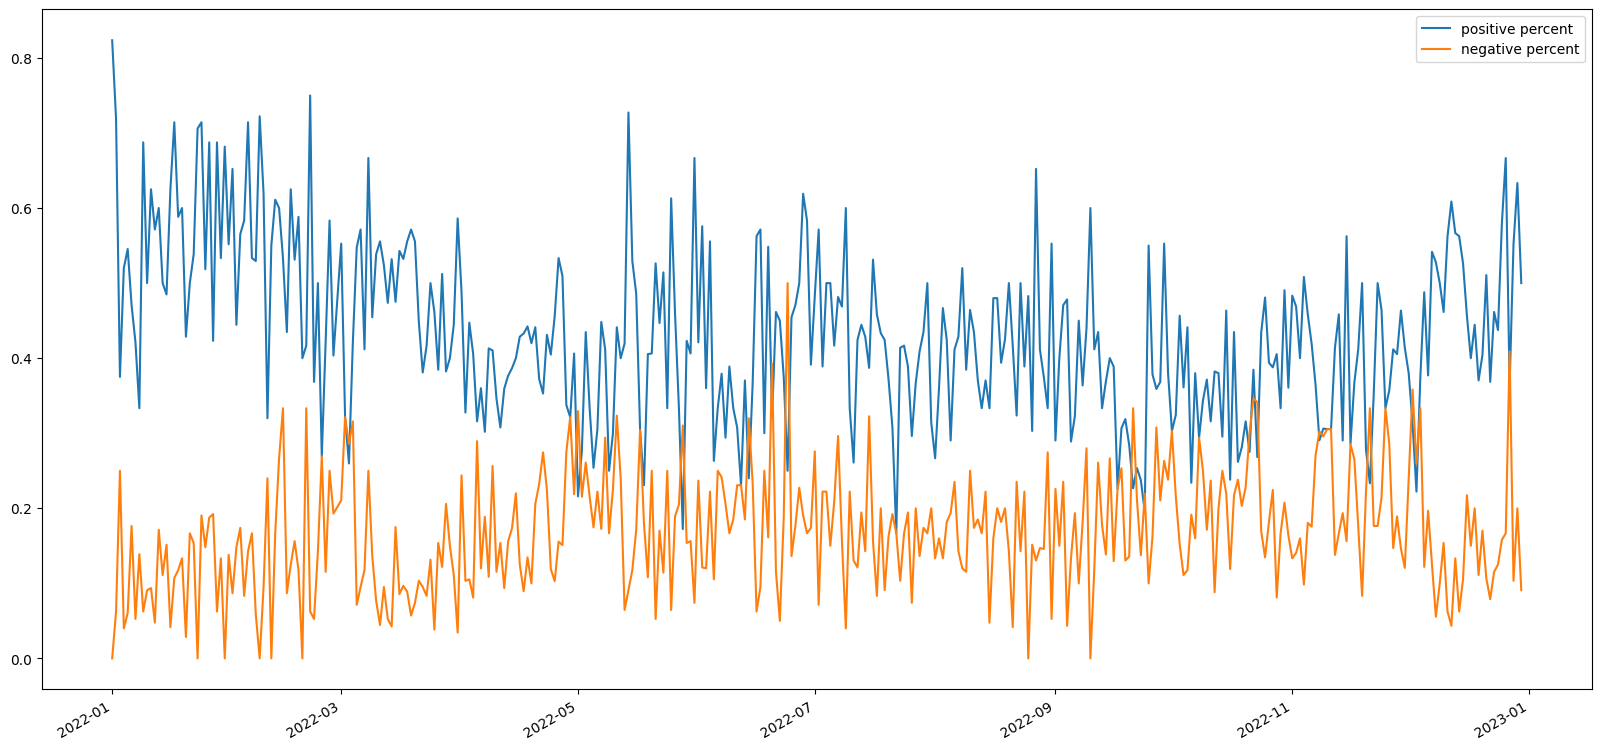

In [ ]:
rcParams['figure.figsize'] = 20, 10

x_1 = graph_db['x_pos']
x_2 = graph_db['x_neg']
x_3 = graph_db['x_neut']
y = graph_db['date']
# plot
plt.plot(y, x_1, label = 'positive percent')
plt.plot(y, x_2, label = 'negative percent')
# plt.plot(y, x_3, label = 'neutral percent')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

**Забираем данные с NFT-GO по маркет капе** 

In [ ]:
url = "https://data-api.nftgo.io/eth/v1/market/chart/marketcap?start_time=2022-06-01T00%3A00%3A00%2B00%3A00&end_time=2022-09-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_2 = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/floor-price?start_time=2022-06-01T00%3A00%3A00%2B00%3A00&end_time=2022-08-31T00%3A00%3A00%2B00%3A00&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_1 = requests.get(url_2, headers=headers)

print(response.text)
data_1 = response.json()
print(len(data_1['x']))
data__bayc_1 = response_bayc_1.json()
print(len(data__bayc_1['x']))

# данные 06_01 до 09_01

{"last_updated":1684406338,"x":[1654041600,1654128000,1654214400,1654300800,1654387200,1654473600,1654560000,1654646400,1654732800,1654819200,1654905600,1654992000,1655078400,1655164800,1655251200,1655337600,1655424000,1655510400,1655596800,1655683200,1655769600,1655856000,1655942400,1656028800,1656115200,1656201600,1656288000,1656374400,1656460800,1656547200,1656633600,1656720000,1656806400,1656892800,1656979200,1657065600,1657152000,1657238400,1657324800,1657411200,1657497600,1657584000,1657670400,1657756800,1657843200,1657929600,1658016000,1658102400,1658188800,1658275200,1658361600,1658448000,1658534400,1658620800,1658707200,1658793600,1658880000,1658966400,1659052800,1659139200,1659225600,1659312000,1659398400,1659484800,1659571200,1659657600,1659744000,1659830400,1659916800,1660003200,1660089600,1660176000,1660262400,1660348800,1660435200,1660521600,1660608000,1660694400,1660780800,1660867200,1660953600,1661040000,1661126400,1661212800,1661299200,1661385600,1661472000,1661558400,

In [ ]:
url = "https://data-api.nftgo.io/eth/v1/market/chart/marketcap?start_time=2022-09-01T00%3A00%3A00%2B00%3A00&end_time=2022-12-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_2 = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/floor-price?start_time=2022-09-01T00%3A00%3A00%2B00%3A00&end_time=2022-12-01T00%3A00%3A00%2B00%3A00&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_2 = requests.get(url_2, headers=headers)

data_2 = response.json()
print(len(data_2['x']))
data__bayc_2 = response_bayc_2.json()
print(len(data__bayc_2['x']))

# данные 09_01 до 12_01

91
92


In [ ]:
url = "https://data-api.nftgo.io/eth/v1/market/chart/marketcap?start_time=2022-12-01T00%3A00%3A00%2B00%3A00&end_time=2023-01-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_2 = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/floor-price?start_time=2022-12-02T00%3A00%3A00%2B00%3A00&end_time=2022-12-31T00%3A00%3A00%2B00%3A00&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_3 = requests.get(url_2, headers=headers)

data_3 = response.json()
print(len(data_3['x']))
data__bayc_3 = response_bayc_3.json()
print(len(data__bayc_3['x']))


# данные 12_01 до 01_01

31
30


**Забираем данные с NFT-GO по объёмам** 

In [ ]:
# Whole market
url = "https://data-api.nftgo.io/eth/v1/market/chart/volume?start_time=2022-06-01T00%3A00%3A00%2B00%3A00&end_time=2022-09-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_bayc = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/volume?start_time=2022-06-01T00%3A00%3A00%2B00%3A00&end_time=2022-09-01T00%3A00%3A00%2B00%3A00&time_interval=1d&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_1 = requests.get(url_bayc, headers=headers)

print(response.text)
volume_1 = response.json()
print(len(volume_1['x']))
volume_bayc_1 = response_bayc_1.json()
print(len(volume_bayc_1['x']))

{"last_updated":1684407036,"x":[1654041600,1654128000,1654214400,1654300800,1654387200,1654473600,1654560000,1654646400,1654732800,1654819200,1654905600,1654992000,1655078400,1655164800,1655251200,1655337600,1655424000,1655510400,1655596800,1655683200,1655769600,1655856000,1655942400,1656028800,1656115200,1656201600,1656288000,1656374400,1656460800,1656547200,1656633600,1656720000,1656806400,1656892800,1656979200,1657065600,1657152000,1657238400,1657324800,1657411200,1657497600,1657584000,1657670400,1657756800,1657843200,1657929600,1658016000,1658102400,1658188800,1658275200,1658361600,1658448000,1658534400,1658620800,1658707200,1658793600,1658880000,1658966400,1659052800,1659139200,1659225600,1659312000,1659398400,1659484800,1659571200,1659657600,1659744000,1659830400,1659916800,1660003200,1660089600,1660176000,1660262400,1660348800,1660435200,1660521600,1660608000,1660694400,1660780800,1660867200,1660953600,1661040000,1661126400,1661212800,1661299200,1661385600,1661472000,1661558400,

In [ ]:
# Whole market
url = "https://data-api.nftgo.io/eth/v1/market/chart/volume?start_time=2022-09-01T00%3A00%3A00%2B00%3A00&end_time=2022-12-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_bayc = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/volume?start_time=2022-09-01T00%3A00%3A00%2B00%3A00&end_time=2022-12-01T00%3A00%3A00%2B00%3A00&time_interval=1d&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_2 = requests.get(url_bayc, headers=headers)

print(response.text)
volume_2 = response.json()
print(len(volume_2['x']))
volume_bayc_2 = response_bayc_2.json()
print(len(volume_bayc_2['x']))

{"last_updated":1684407042,"x":[1661990400,1662076800,1662163200,1662249600,1662336000,1662422400,1662508800,1662595200,1662681600,1662768000,1662854400,1662940800,1663027200,1663113600,1663200000,1663286400,1663372800,1663459200,1663545600,1663632000,1663718400,1663804800,1663891200,1663977600,1664064000,1664150400,1664236800,1664323200,1664409600,1664496000,1664582400,1664668800,1664755200,1664841600,1664928000,1665014400,1665100800,1665187200,1665273600,1665360000,1665446400,1665532800,1665619200,1665705600,1665792000,1665878400,1665964800,1666051200,1666137600,1666224000,1666310400,1666396800,1666483200,1666569600,1666656000,1666742400,1666828800,1666915200,1667001600,1667088000,1667174400,1667260800,1667347200,1667433600,1667520000,1667606400,1667692800,1667779200,1667865600,1667952000,1668038400,1668124800,1668211200,1668297600,1668384000,1668470400,1668556800,1668643200,1668729600,1668816000,1668902400,1668988800,1669075200,1669161600,1669248000,1669334400,1669420800,1669507200,

In [ ]:
# Whole market
url = "https://data-api.nftgo.io/eth/v1/market/chart/volume?start_time=2022-12-01T00%3A00%3A00%2B00%3A00&end_time=2023-01-01T00%3A00%3A00%2B00%3A00&unit=ETH"
# BAYC:
url_bayc = "https://data-api.nftgo.io/eth/v1/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/chart/volume?start_time=2022-12-01T00%3A00%3A00%2B00%3A00&end_time=2023-01-01T00%3A00%3A00%2B00%3A00&time_interval=1d&unit=ETH"

headers = {
    "accept": "application/json",
    "X-API-KEY": "7fd61286-3264-41a5-93f0-7d4fef80dfa6"
}

response = requests.get(url, headers=headers)
response_bayc_3 = requests.get(url_bayc, headers=headers)

print(response.text)
volume_3 = response.json()
print(len(volume_3['x']))
volume_bayc_3 = response_bayc_3.json()
print(len(volume_bayc_3['x']))

{"last_updated":1684407047,"x":[1669852800,1669939200,1670025600,1670112000,1670198400,1670284800,1670371200,1670457600,1670544000,1670630400,1670716800,1670803200,1670889600,1670976000,1671062400,1671148800,1671235200,1671321600,1671408000,1671494400,1671580800,1671667200,1671753600,1671840000,1671926400,1672012800,1672099200,1672185600,1672272000,1672358400,1672444800],"y":[11383.893098662866,10043.181918085973,8584.744961918608,10158.39837721195,10380.90526286064,16077.160459136057,14836.857525482043,13094.1573766179,12164.576198170944,31736.415065286335,23576.861360961713,16766.71424768681,20350.238714556228,21367.94392390578,15932.693567494507,15717.307674623775,16546.525837589274,15185.422513260524,12694.373082472988,22537.442403107772,21911.807187876144,22879.82696996801,25043.485999485856,17962.573398438966,15197.426825518161,20060.767762381918,27598.868999608105,26867.207124946195,25937.443482672443,18235.9639194375,16716.296267681235]}
31
31


**Склеиваем для графиков**

In [ ]:
timestamps_06_01_01_01 = list(itertools.chain(data_1['x'], data_2['x'],data_3['x']))
timestamps_bayc_mc = list(itertools.chain(data__bayc_1['x'], data__bayc_2['x'],data__bayc_3['x']))
timestamps_bayc_vol = list(itertools.chain(volume_bayc_1['x'], volume_bayc_2['x'],volume_bayc_3['x']))
timestamps_whole_vol = list(itertools.chain(volume_1['x'], volume_2['x'],volume_3['x']))

In [ ]:
temp_1 = list(map(int, data_1['y']))
temp_2 = list(map(int, data_2['y']))
temp_3 = list(map(int, data_3['y']))

In [ ]:
market_cap_06_01_01_01 = list(itertools.chain(temp_1, temp_2, temp_3))
bayc_mc = list(itertools.chain(list(map(int, data__bayc_1['y'])), list(map(int, data__bayc_2['y'])), list(map(int, data__bayc_3['y']))))
bayc_vol = list(itertools.chain(list(map(int, volume_bayc_1['y'])), list(map(int, volume_bayc_2['y'])), list(map(int, volume_bayc_3['y']))))
whole_vol = list(itertools.chain(list(map(int, volume_1['y'])), list(map(int, volume_2['y'])), list(map(int, volume_3['y']))))

In [ ]:
df = pd.DataFrame(list(zip(timestamps_06_01_01_01, market_cap_06_01_01_01)),
               columns =['date', 'Marketcap'])
df_bayc_mc = pd.DataFrame(list(zip(timestamps_bayc_mc, bayc_mc)),
               columns =['date', 'Marketcap'])
df_bayc_vol = pd.DataFrame(list(zip(timestamps_bayc_vol, bayc_vol)),
               columns =['date', 'Volume'])
df_whole_vol = pd.DataFrame(list(zip(timestamps_whole_vol, whole_vol)),
               columns =['date', 'Volume'])

In [ ]:
df.to_csv('df_whole_mc.csv')
df_bayc_mc.to_csv('df_bayc_mc.csv')
df_bayc_vol.to_csv('df_bayc_vol.csv')
df_whole_vol.to_csv('df_whole_vol.csv')

In [ ]:
df.head()


,date,Marketcap
0,1654041600,6708019
1,1654128000,6745433
2,1654214400,6719117
3,1654300800,6733795
4,1654387200,6671222


In [ ]:
df.loc[:, 'date'] = df.date.apply( lambda x:  datetime.datetime.fromtimestamp(x).replace(tzinfo=None).strftime('%Y-%m-%d') )
df.loc[:, 'date'] = df.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df.loc[:, 'Marketcap'] = df.Marketcap.apply( lambda x: x / 10000000 )

df_bayc_mc.loc[:, 'date'] = df_bayc_mc.date.apply( lambda x:  datetime.datetime.fromtimestamp(x).replace(tzinfo=None).strftime('%Y-%m-%d') )
df_bayc_mc.loc[:, 'date'] = df_bayc_mc.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_bayc_mc.loc[:, 'Marketcap'] = df_bayc_mc.Marketcap.apply( lambda x: x / 100 )

df_bayc_vol.loc[:, 'date'] = df_bayc_vol.date.apply( lambda x:  datetime.datetime.fromtimestamp(x).replace(tzinfo=None).strftime('%Y-%m-%d') )
df_bayc_vol.loc[:, 'date'] = df_bayc_vol.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_bayc_vol.loc[:, 'Volume'] = df_bayc_vol.Volume.apply( lambda x: x / 500 )

df_whole_vol.loc[:, 'date'] = df_whole_vol.date.apply( lambda x:  datetime.datetime.fromtimestamp(x).replace(tzinfo=None).strftime('%Y-%m-%d') )
df_whole_vol.loc[:, 'date'] = df_whole_vol.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_whole_vol.loc[:, 'Volume'] = df_whole_vol.Volume.apply( lambda x: x / 50000 )

<ipython-input-233-66e177c4f29b>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'date'] = df.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
<ipython-input-233-66e177c4f29b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_bayc_mc.loc[:, 'date'] = df_bayc_mc.date.apply( lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
<ipython-input-233-66e177c4f29b>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retai

In [ ]:

dtc = datetime.datetime.strptime('01.06.2022', '%d.%m.%Y')
dtc_end = datetime.datetime.strptime('31.12.2022', '%d.%m.%Y')

graph_db = graph_db[graph_db.date.between(dtc, dtc_end)]
df = df[df.date.between(dtc, dtc_end)]

df_bayc_mc = df_bayc_mc[df.date.between(dtc, dtc_end)]
df_bayc_vol = df_bayc_vol[df.date.between(dtc, dtc_end)]
df_whole_vol = df_whole_vol[df.date.between(dtc, dtc_end)]
# x = df['date'].to_list()
# t = graph_db['date'].to_list()

# for i in range(len(t)):
#   print(x[i], t[i])

<ipython-input-235-859545ac9448>:22: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


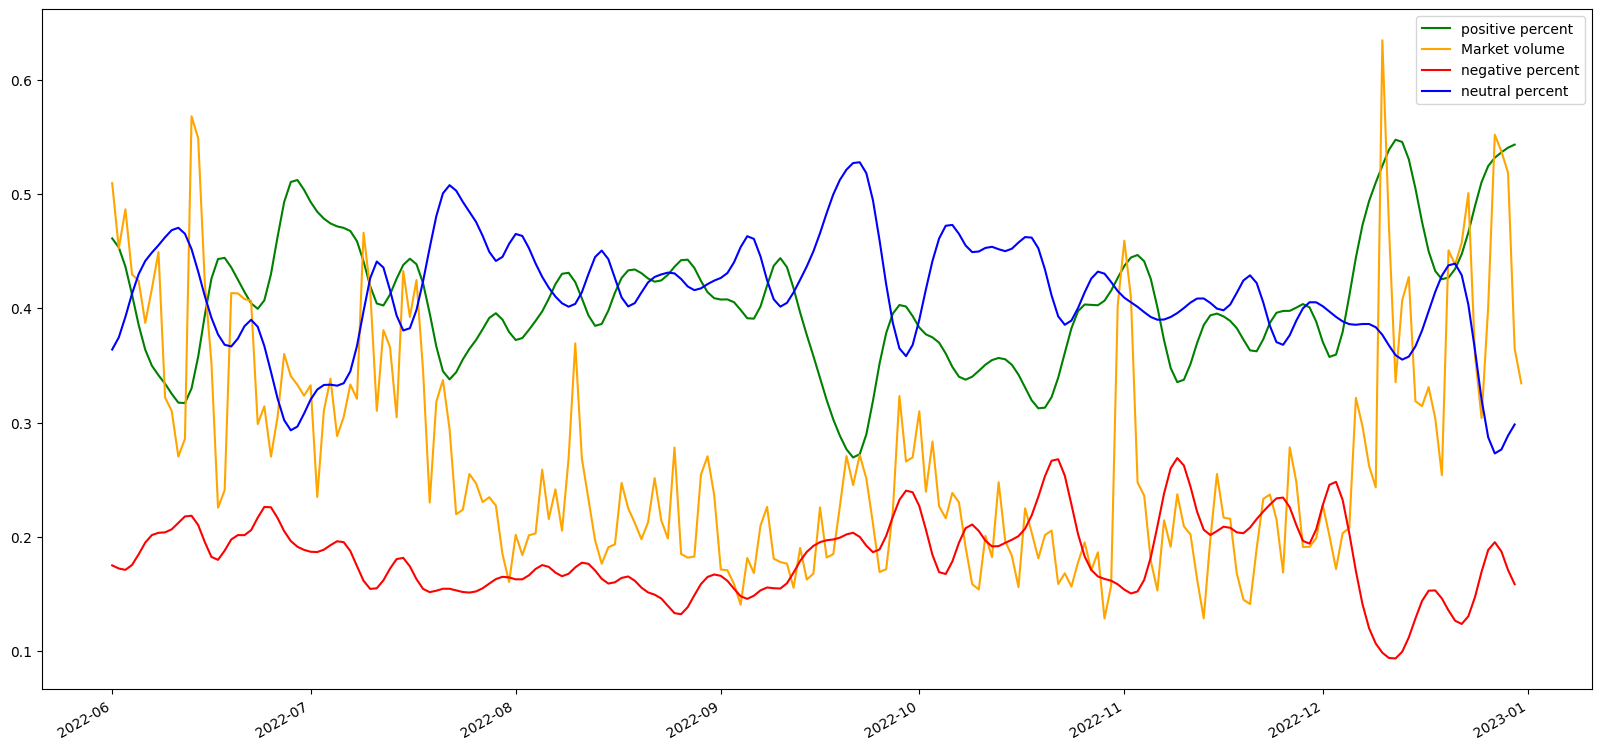

In [ ]:
rcParams['figure.figsize'] = 20, 10

y_1 = graph_db['x_pos']
y_2 = graph_db['x_neg']
y_3 = graph_db['x_neut']
y_4 = (graph_db['x_pos'] - graph_db['x_neg']) * 2
x = graph_db['date']

import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline



dates = df_whole_vol['date']
market_cap = df_whole_vol['Volume']



# plot
# plt.plot(y, x_1, label = 'positive percent')
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed_1 = gaussian_filter1d(y_1, sigma=2)
ysmoothed_2 = gaussian_filter1d(y_2, sigma=2)
ysmoothed_3 = gaussian_filter1d(y_3, sigma=2)
ysmoothed_4 = gaussian_filter1d(y_4, sigma=2)
plt.plot(x, ysmoothed_1, label = 'positive percent', color = 'green')
plt.plot(dates, market_cap, label = 'Market volume', color = 'orange')
plt.plot(x, ysmoothed_2, label = 'negative percent', color = 'red')
plt.plot(x, ysmoothed_3, label = 'neutral percent', color = 'blue')
# plt.plot(x, ysmoothed_4, label = 'pos - neg', color = 'black')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.legend()
# plt.grid ( axis='x' )
plt.show()

In [ ]:
def price_corr(sentiment, market_cap):
  days = list(range(-7, 8))
  corr = list()
  for i in range(-7, 8):
    if i > 0:
      sentiment = sentiment[:-i]
      market_cap =  market_cap[i:]
    if i < 0:
      sentiment = sentiment[:i]
      market_cap =  market_cap[-i:]
    corr.append(get_corr(sentiment, market_cap))
  return days, corr

mc = df['Marketcap'].to_list()
mc = mc[:-2]
print(len(mc), len(y_1))

pos_corr = list(price_corr(y_1, mc))
neg_corr = list(price_corr(y_2, mc))
neut_corr = list(price_corr(y_3, mc))
pos_neg_corr = list(price_corr(y_4, mc))

corr_list = [pos_corr, neg_corr, neut_corr, pos_neg_corr]
    
for i in corr_list:
  for j in i[1]:
    print(round(j,2), end=' ')
  print('\n')


212 212
0.01 0.04 0.03 0.06 0.03 0.06 0.06 0.06 0.06 0.01 0.08 0.05 0.06 0.04 -0.05 

-0.04 -0.0 0.07 0.07 0.06 0.07 0.06 0.06 0.04 0.09 0.07 0.2 0.16 0.16 0.13 

0.01 -0.04 -0.06 -0.09 -0.06 -0.09 -0.08 -0.08 -0.07 -0.05 -0.11 -0.15 -0.15 -0.13 -0.03 

0.03 0.03 -0.01 0.02 -0.0 0.01 0.02 0.02 0.03 -0.03 0.03 -0.04 -0.02 -0.04 -0.1 



In [ ]:
mc = df_whole_vol['Volume'].to_list()
mc = mc[:-2]
print(len(mc), len(y_1))

pos_corr = list(price_corr(y_1, mc))
neg_corr = list(price_corr(y_2, mc))
neut_corr = list(price_corr(y_3, mc))
pos_neg_corr = list(price_corr(y_4, mc))

corr_list = [pos_corr, neg_corr, neut_corr, pos_neg_corr]
    
for i in corr_list:
  for j in i[1]:
    print(round(j,2), end=' ')
  print('\n')

212 212
0.02 0.03 -0.07 -0.02 -0.07 -0.19 -0.21 -0.21 -0.12 -0.11 -0.16 -0.16 -0.1 -0.06 0.1 

-0.07 0.01 0.14 -0.15 -0.03 -0.01 -0.04 -0.04 -0.05 0.09 0.03 0.05 0.04 0.0 -0.11 

0.02 -0.03 -0.01 0.1 0.08 0.18 0.22 0.22 0.14 0.06 0.14 0.13 0.07 0.06 -0.03 

0.05 0.02 -0.13 0.05 -0.04 -0.15 -0.15 -0.15 -0.07 -0.13 -0.14 -0.15 -0.1 -0.05 0.13 



In [ ]:
mc = df_bayc_mc['Marketcap'].to_list()
mc = mc[:-2]
print(len(mc), len(y_1))

pos_corr = list(price_corr(y_1, mc))
neg_corr = list(price_corr(y_2, mc))
neut_corr = list(price_corr(y_3, mc))
pos_neg_corr = list(price_corr(y_4, mc))

corr_list = [pos_corr, neg_corr, neut_corr, pos_neg_corr]
    
for i in corr_list:
  for j in i[1]:
    print(round(j,2), end=' ')
  print('\n')

212 212
0.08 0.1 0.03 -0.0 0.01 0.01 0.02 0.02 0.0 0.03 0.03 0.07 0.05 -0.02 -0.1 

0.01 0.04 0.09 0.07 0.08 0.04 0.02 0.02 0.01 0.02 0.09 0.15 0.17 0.13 0.06 

-0.08 -0.12 -0.08 -0.03 -0.05 -0.03 -0.03 -0.03 -0.01 -0.04 -0.08 -0.14 -0.14 -0.05 0.06 

0.06 0.07 -0.01 -0.03 -0.03 -0.01 0.01 0.01 -0.0 0.02 -0.01 -0.01 -0.04 -0.08 -0.1 



In [ ]:
mc = df_bayc_vol['Volume'].to_list()
mc = mc[:-1]
print(len(mc), len(y_1))

pos_corr = list(price_corr(y_1, mc))
neg_corr = list(price_corr(y_2, mc))
neut_corr = list(price_corr(y_3, mc))
pos_neg_corr = list(price_corr(y_4, mc))

corr_list = [pos_corr, neg_corr, neut_corr, pos_neg_corr]
    
for i in corr_list:
  for j in i[1]:
    print(round(j,2), end=' ')
  print('\n')

213 213
-0.15 0.05 -0.02 -0.02 0.0 -0.0 -0.1 -0.1 -0.04 -0.01 0.0 -0.04 0.05 -0.03 -0.01 

0.12 -0.05 0.16 0.09 0.13 0.06 0.07 0.07 0.04 -0.05 -0.04 -0.06 -0.08 -0.04 0.02 

0.08 -0.02 -0.08 -0.04 -0.08 -0.03 0.07 0.07 0.02 0.04 0.02 0.08 0.0 0.05 -0.01 

-0.16 0.06 -0.09 -0.05 -0.05 -0.03 -0.11 -0.11 -0.05 0.02 0.02 -0.0 0.07 -0.0 -0.02 



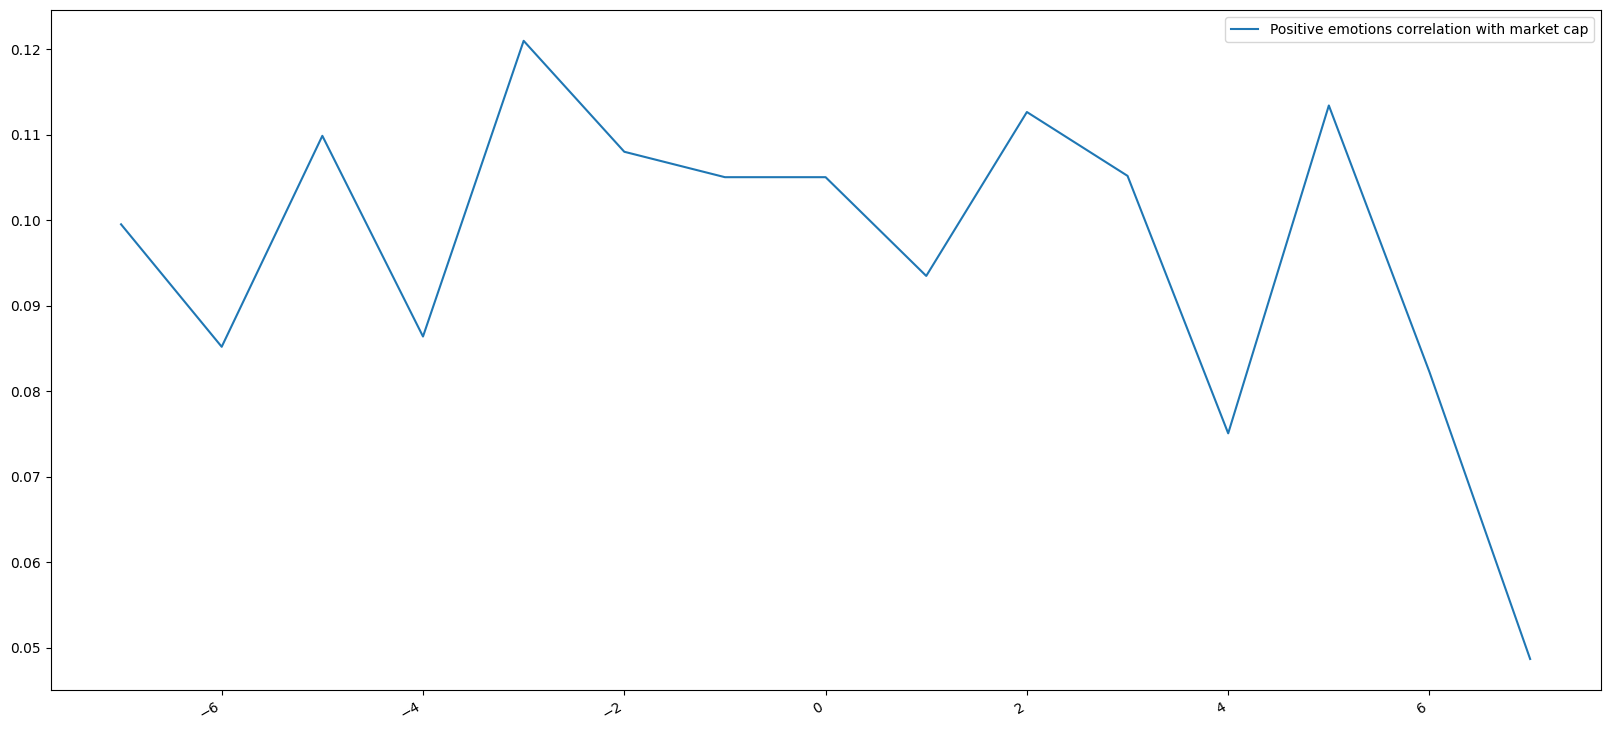

In [ ]:
rcParams['figure.figsize'] = 20, 10

plt.plot(pos_corr[0], pos_corr[1], label = 'Positive emotions correlation with market cap')

plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

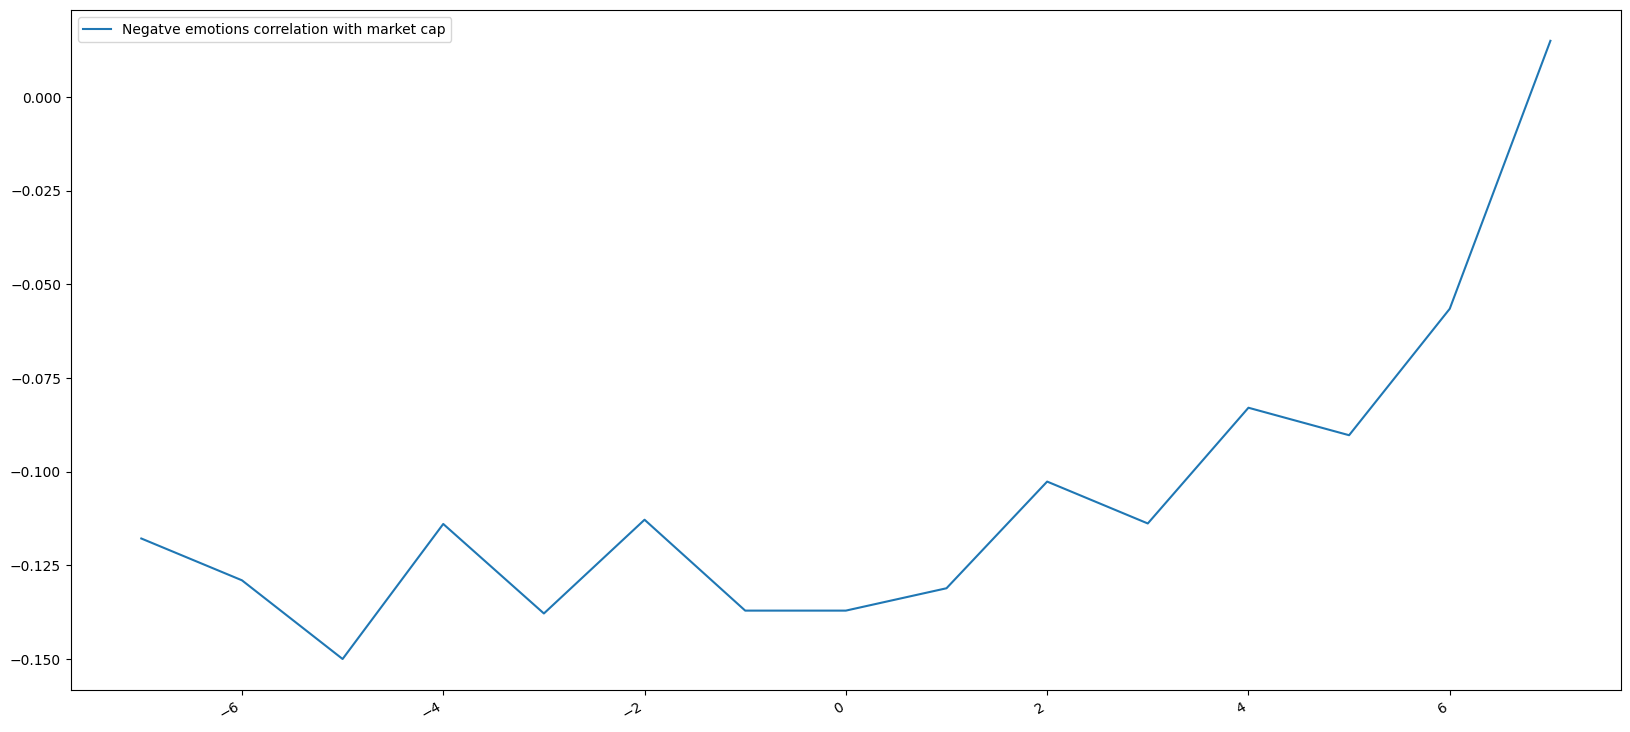

In [ ]:
rcParams['figure.figsize'] = 20, 10

plt.plot(neg_corr[0], neg_corr[1], label = 'Negatve emotions correlation with market cap')

plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

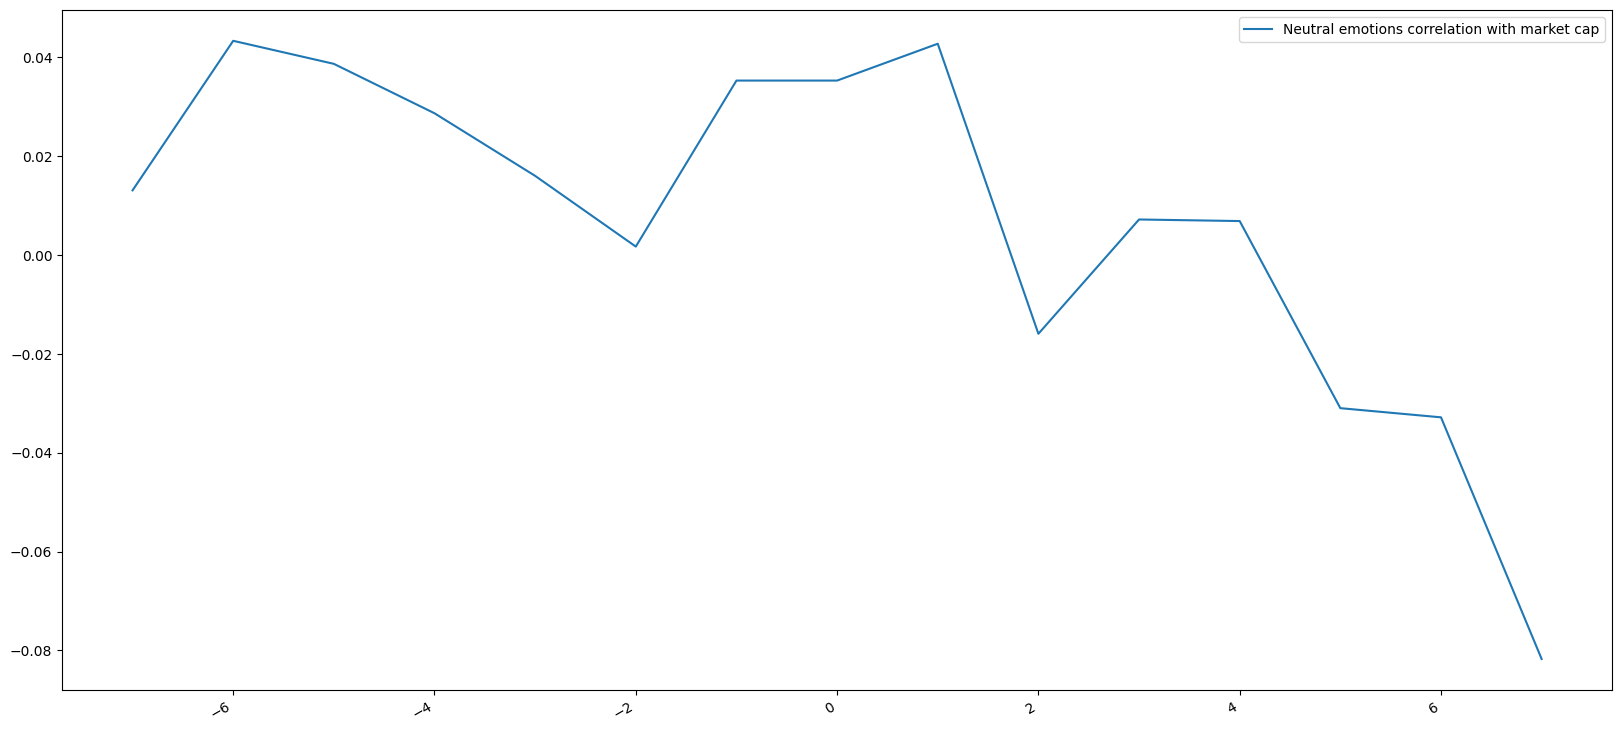

In [ ]:
rcParams['figure.figsize'] = 20, 10

plt.plot(neut_corr[0], neut_corr[1], label = 'Neutral emotions correlation with market cap')

plt.gcf().autofmt_xdate()
plt.legend()

plt.show()

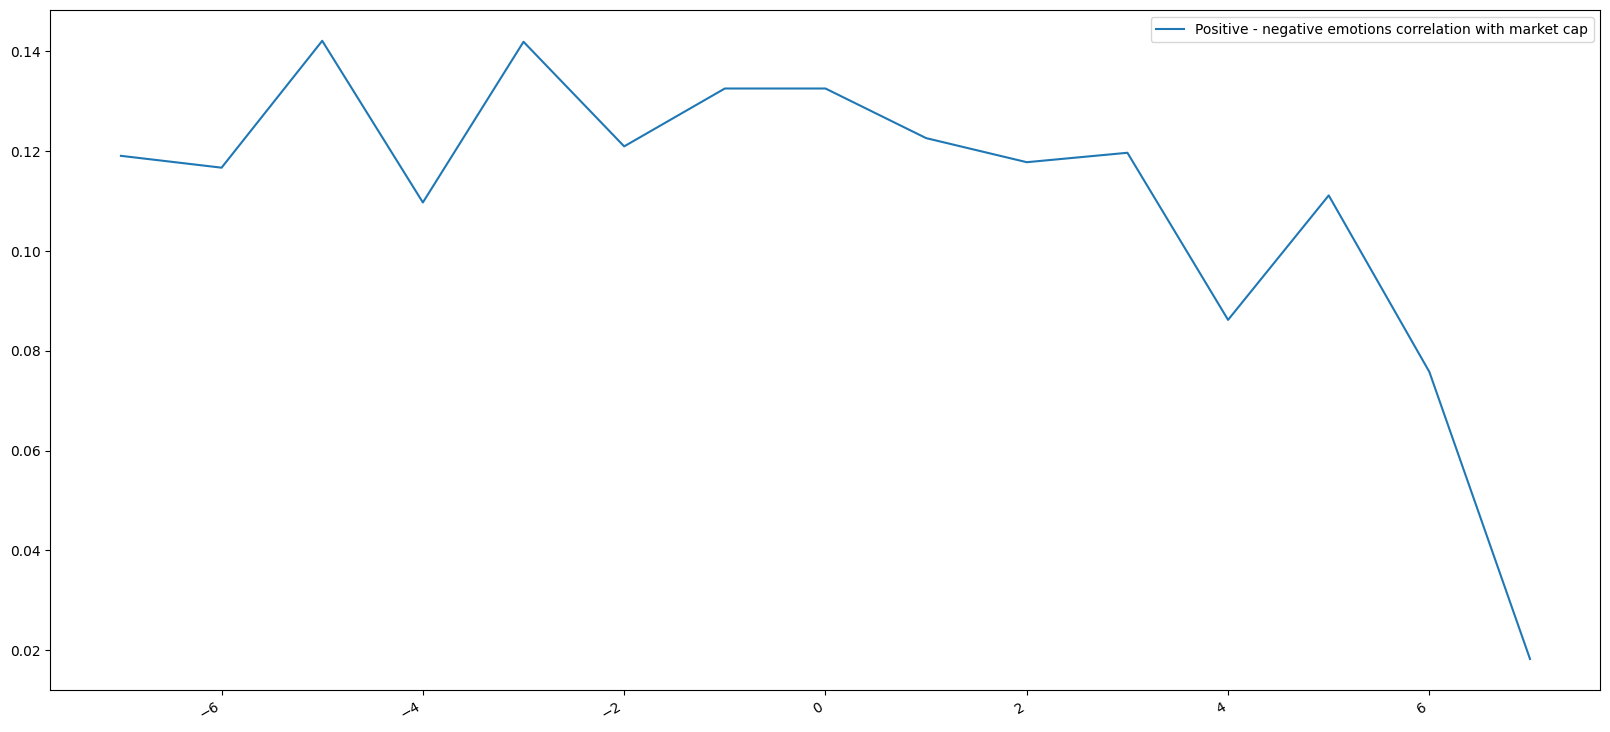

In [ ]:
rcParams['figure.figsize'] = 20, 10

plt.plot(pos_neg_corr[0], pos_neg_corr[1], label = 'Positive - negative emotions correlation with market cap')

plt.gcf().autofmt_xdate()
plt.legend()

plt.show()